<a href="https://colab.research.google.com/github/neetmadann/Portfolio-GeoSpatial-and-Machine-Learning/blob/main/Mobile_Payment_Fraud_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imported packages such as pandas, numpy, matploblib and seaborn
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib
import os
import matplotlib.pyplot as plt
import matplotlib.dates as md
from itertools import cycle, islice

# Model evaluations
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix, classification_report # classification metrics

# Models from Scikit-Learn
from sklearn import preprocessing
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB # Gaussain Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier

# Data Preparation (imbalanced and standardization)
from imblearn.over_sampling import SMOTE # SMOTE
from sklearn.preprocessing import StandardScaler # scaling method
from collections import Counter
from sklearn.datasets import make_classification



from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation

#settings
pd.options.display.float_format = '{:.2f}'.format



In [ ]:
df = pd.read_csv('Fraud.csv')

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


In [ ]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
df.info(null_counts=True)

C:\Users\neetm\AppData\Local\Temp/ipykernel_25856/1982639406.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            6362620 non-null  int64  
 1   type            6362620 non-null  object 
 2   amount          6362620 non-null  float64
 3   nameOrig        6362620 non-null  object 
 4   oldbalanceOrg   6362620 non-null  float64
 5   newbalanceOrig  6362620 non-null  float64
 6   nameDest        6362620 non-null  object 
 7   oldbalanceDest  6362620 non-null  float64
 8   newbalanceDest  6362620 non-null  float64
 9   isFraud         6362620 non-null  int64  
 10  isFlaggedFraud  6362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isnull().values.any()

False

In [ ]:
{column: len(df[column].unique()) for column in df.columns}

{'step': 743,
 'type': 5,
 'amount': 5316900,
 'nameOrig': 6353307,
 'oldbalanceOrg': 1845844,
 'newbalanceOrig': 2682586,
 'nameDest': 2722362,
 'oldbalanceDest': 3614697,
 'newbalanceDest': 3555499,
 'isFraud': 2,
 'isFlaggedFraud': 2}

In [ ]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

KeyError: "['nameOrig' 'nameDest'] not found in axis"

In [ ]:
print(df['type'].unique())

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [ ]:
print(df['type'].count()) #total counts
print(df['type'].value_counts())

6362620
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [ ]:
print(df['isFraud'].unique())
print(df['isFlaggedFraud'].unique())

[0 1]
[0 1]


In [ ]:
# change categorical variable to binary and change unknown value in Sex to NaN for now
#df['isFraud'].replace(1,'Fraud',inplace=True) #change to categorical for ease
#df['isFraud'].replace(0,'Non_Fraud',inplace=True) #change to categorical for ease

Text(0.5, 1.0, 'Imbalanced Dataset')

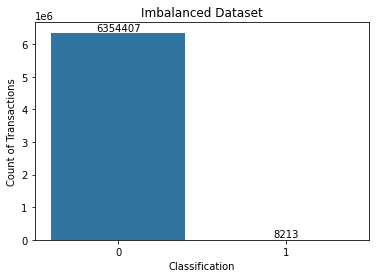

In [ ]:
ax = sns.countplot(x=df['isFraud'],
                   order=df['isFraud'].value_counts(ascending=False).index); #plot nominal data frequency distribution
abs_values = df['isFraud'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xlabel("Classification")
plt.ylabel("Count of Transactions")
plt.title("Imbalanced Dataset")
#strategic 

#SMOTE #oversampling #undersampling

In [ ]:
#(df['isFraud'].value_counts()['1']/len(df['isFraud']))*100


In [ ]:
#df['isFraud'].value_counts()['Non_Fraud']

[Text(0, 0, '6362604'), Text(0, 0, '16')]

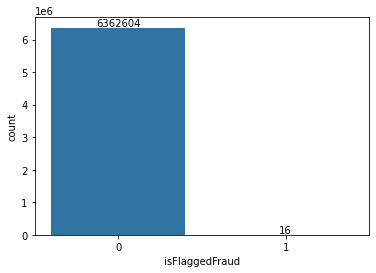

In [ ]:
ax = sns.countplot(x=df['isFlaggedFraud'],
                   order=df['isFlaggedFraud'].value_counts(ascending=False).index); #plot nominal data frequency distribution
abs_values = df['isFlaggedFraud'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


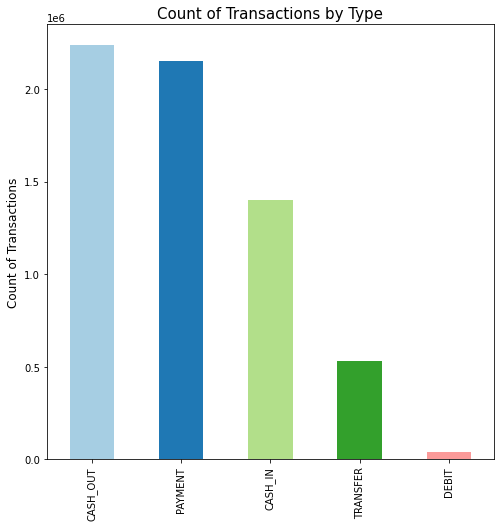

In [ ]:
print(df.type.value_counts())

f, ax = plt.subplots(1, 1, figsize=(8, 6))
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
df.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8),color=plt.cm.Paired(np.arange(len(df.type.unique()))))
plt.ylabel("Count of Transactions", size=12)
plt.title("Count of Transactions by Type", size=15)
plt.show()

In [ ]:
le = preprocessing.LabelEncoder()
df.type = le.fit_transform(df.type)

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0,0


In [ ]:
df.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,1.71,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,1.35,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,1.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,1.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,3.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,4.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [ ]:
#Setting feature vector and target variable
target_variable = 'isFraud'
y = df.isFraud #add target variable Severity to y - dependent variable
X = df.drop(['step','isFraud', 'isFlaggedFraud'], axis=1)  #remove target variable from x features, and rest are features

In [ ]:
used = df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest', 'newbalanceDest', 'isFraud']]
used.describe()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,1.71,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00
std,1.35,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,13389.57,0.00,0.00,0.00,0.00,0.00
50%,1.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00
75%,3.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00
max,4.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00


In [ ]:
print('The shape of X and y are') 
# summarize the dataset
print(X.shape, y.shape)

The shape of X and y are
(6362620, 6) (6362620,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
X= pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

In [ ]:
#baseline 
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='uniform')
dummy_clf.fit(X, y)
DummyClassifier(strategy='uniform')
dummy_clf.score(X, y)

0.49999795681653153

In [ ]:
#check multicollinearity of first 30 features as an example
display(X.corr()) #display correlation to check multicollinearity of feature dataset

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
type,1.00,0.09,-0.34,-0.35,-0.10,-0.06
amount,0.09,1.00,-0.00,-0.01,0.29,0.46
oldbalanceOrg,-0.34,-0.00,1.00,1.00,0.07,0.04
newbalanceOrig,-0.35,-0.01,1.00,1.00,0.07,0.04
oldbalanceDest,-0.10,0.29,0.07,0.07,1.00,0.98
newbalanceDest,-0.06,0.46,0.04,0.04,0.98,1.00


In [ ]:
# example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 8213, 1: 8213})


Text(0.5, 1.0, 'Balanced Dataset')

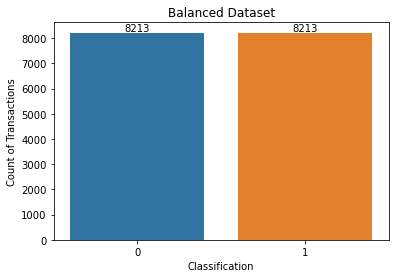

In [ ]:
ax = sns.countplot(x=y_over,
                   order=y_over.value_counts(ascending=False).index); #plot nominal data frequency distribution
abs_values = y_over.value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xlabel("Classification")
plt.ylabel("Count of Transactions")
plt.title("Balanced Dataset")
#strategic 

In [ ]:
y_over

0        0
1        0
2        0
3        0
4        0
        ..
16421    1
16422    1
16423    1
16424    1
16425    1
Name: isFraud, Length: 16426, dtype: int64

In [ ]:
fig, ax = plt.subplots(figsize=(8,5)) 
corr = X_over.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
#as you can see there is high multicollinearity
#heatmap to show multicollinearity of first 30 features in X, python cannot handle displaying over 16k features

NameError: name 'plt' is not defined

In [ ]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training set

clf.fit(X_over, y_over)

RandomForestClassifier(random_state=42)

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_over.columns).sort_values(ascending=False)

feature_scores

oldbalanceOrg    0.34
amount           0.19
newbalanceOrig   0.19
type             0.17
newbalanceDest   0.07
oldbalanceDest   0.05
dtype: float64

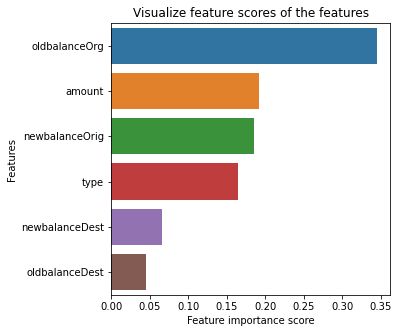

In [ ]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(5, 5))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over,test_size=0.4,random_state=42,shuffle=True)

In [ ]:
len(y_train)

9855

In [ ]:
df2 = pd.concat([X_train, pd.DataFrame(y_train)], axis=1)

In [ ]:
df2

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
6499,-1.27,0.24,0.04,0.14,0.08,-0.05,0
7914,-0.53,0.17,-0.25,-0.29,-0.24,-0.18,0
9214,-0.53,0.31,-0.16,-0.29,-0.31,-0.23,1
7964,-0.53,-0.09,-0.29,-0.29,-0.31,-0.29,0
16366,1.69,-0.01,-0.23,-0.29,-0.32,-0.33,1
...,...,...,...,...,...,...,...
11284,1.69,-0.03,-0.23,-0.29,-0.32,-0.33,1
11964,1.69,-0.02,-0.23,-0.29,-0.32,-0.33,1
5390,0.95,-0.29,-0.29,-0.29,-0.32,-0.33,0
860,-0.53,-0.14,-0.29,-0.29,0.16,0.14,0


In [ ]:
from sklearn.decomposition import PCA #import PCA
pca = PCA() 
x_pca = pca.fit_transform(X_train) #PCA on Train dataset
X_test_pca = pca.transform(X_test) #PCA on test dataset
pca.explained_variance_ratio_ #PCA ratio
tot_var = np.array(pca.explained_variance_ratio_) #calculate all features and their variance ratio
print(tot_var)
tot_var.cumsum()

[0.67129292 0.16371164 0.09879879 0.06172134 0.00366423 0.00081107]


array([0.67129292, 0.83500456, 0.93380335, 0.99552469, 0.99918893,
       1.        ])

In [ ]:
df2.sample(2000)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
9828,-0.53,-0.04,-0.23,-0.29,-0.23,-0.20,1
54,-1.27,-0.09,0.03,0.07,0.08,0.01,0
2735,0.95,-0.25,-0.27,-0.28,-0.32,-0.33,0
7956,-0.53,0.76,-0.29,-0.29,-0.10,0.05,0
13216,1.69,3.47,0.50,-0.29,-0.32,-0.33,1
...,...,...,...,...,...,...,...
12875,-0.53,1.00,-0.02,-0.29,-0.32,-0.12,1
5661,0.95,-0.26,-0.19,-0.20,-0.32,-0.33,0
3227,0.95,-0.30,-0.27,-0.28,-0.32,-0.33,0
4206,-0.53,0.25,-0.27,-0.29,0.18,0.35,0


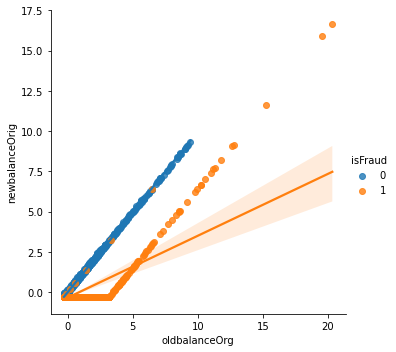

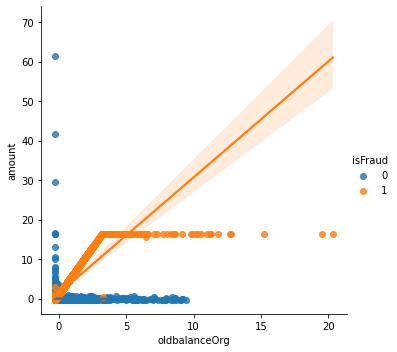

In [ ]:
ax1 = sns.lmplot(x = "oldbalanceOrg", y = "newbalanceOrig", hue = "isFraud",data=df2)
ax2 = sns.lmplot(x = "oldbalanceOrg", y = "amount", hue = "isFraud",data=df2)

In [ ]:
### Determining the number of neighbors using RandomizedSearchCV
param_grid = {'n_neighbors': range(1,20)}
knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, verbose=3)
knn.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.957 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.956 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.954 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.963 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.962 total time=   0.0s
[CV 1/5] END .....................n_neighbors=7;, score=0.946 total time=   0.0s
[CV 2/5] END .....................n_neighbors=7;, score=0.949 total time=   0.0s
[CV 3/5] END .....................n_neighbors=7;, score=0.946 total time=   0.0s
[CV 4/5] END .....................n_neighbors=7;, score=0.952 total time=   0.0s
[CV 5/5] END .....................n_neighbors=7;, score=0.948 total time=   0.0s
[CV 1/5] END ....................n_neighbors=18;, score=0.931 total time=   0.0s
[CV 2/5] END ....................n_neighbors=18;

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 20)},
                   verbose=3)

In [ ]:
knn.best_params_ # best parameter

{'n_neighbors': 1}

In [ ]:
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[3131  177]
 [ 111 3152]]


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3308
           1       0.95      0.97      0.96      3263

    accuracy                           0.96      6571
   macro avg       0.96      0.96      0.96      6571
weighted avg       0.96      0.96      0.96      6571



In [ ]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train,y_train)
clf_pred = clf.predict(X_test)

#KNN #SVM Kernel #logistic Regression
knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[3131  177]
 [ 111 3152]]


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3308
           1       0.95      0.97      0.96      3263

    accuracy                           0.96      6571
   macro avg       0.96      0.96      0.96      6571
weighted avg       0.96      0.96      0.96      6571



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,knn_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,knn_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,knn_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,knn_pred)
print('F1 score: %f' % f1)

Accuracy: 0.956171
Precision: 0.946831
Recall: 0.965982
F1 score: 0.956311


In [ ]:
accuracy_score(y_test,knn_pred)

0.9561710546339979

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)

cm_gnb = confusion_matrix(y_test,gnb_pred)
print(cm_gnb)
print('\n')
print(classification_report(y_test,gnb_pred))
recall = np.diag(cm_gnb) / np.sum(cm_gnb, axis = 1)
print(recall)

[[3153  155]
 [1979 1284]]


              precision    recall  f1-score   support

           0       0.61      0.95      0.75      3308
           1       0.89      0.39      0.55      3263

    accuracy                           0.68      6571
   macro avg       0.75      0.67      0.65      6571
weighted avg       0.75      0.68      0.65      6571

[0.95314389 0.39350291]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,gnb_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,gnb_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,gnb_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,gnb_pred)
print('F1 score: %f' % f1)

Accuracy: 0.675240
Precision: 0.892286
Recall: 0.393503
F1 score: 0.546151


In [ ]:
accuracy_score(y_test,gnb_pred)

0.6752396895449704

In [ ]:
recall = recall_score(y_test,gnb_pred)
print(recall)

0.3935029114311983


In [ ]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

print(confusion_matrix(y_test,dtree_pred))
print('\n')
print(classification_report(y_test,dtree_pred))

[[3272   36]
 [  14 3249]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3308
           1       0.99      1.00      0.99      3263

    accuracy                           0.99      6571
   macro avg       0.99      0.99      0.99      6571
weighted avg       0.99      0.99      0.99      6571



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,dtree_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,dtree_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,dtree_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,dtree_pred)
print('F1 score: %f' % f1)

Accuracy: 0.992391
Precision: 0.989041
Recall: 0.995709
F1 score: 0.992364


In [ ]:
print(accuracy_score(y_test,dtree_pred))

0.9923908080961802


In [ ]:
rfc = RandomForestClassifier(n_estimators=200,random_state=42)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[3270   38]
 [  12 3251]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3308
           1       0.99      1.00      0.99      3263

    accuracy                           0.99      6571
   macro avg       0.99      0.99      0.99      6571
weighted avg       0.99      0.99      0.99      6571



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,rfc_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,rfc_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,rfc_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,rfc_pred)
print('F1 score: %f' % f1)

Accuracy: 0.992391
Precision: 0.988446
Recall: 0.996322
F1 score: 0.992369


In [ ]:
print(accuracy_score(y_test,rfc_pred))

0.9923908080961802


 Luckily, decision trees and boosted trees algorithms are immune to multicollinearity by nature 
 Therefore Random Forest is not affected by multicollinearity that much since it is picking different set of features for different models and of course every model sees a different set of data points.

In [ ]:
bgc = BaggingClassifier(DecisionTreeClassifier(),n_estimators=200)
bgc.fit(X_train,y_train)
bgc_pred = bgc.predict(X_test)

print(confusion_matrix(y_test,bgc_pred))
print('\n')
print(classification_report(y_test,bgc_pred))

[[3278   30]
 [  10 3253]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3308
           1       0.99      1.00      0.99      3263

    accuracy                           0.99      6571
   macro avg       0.99      0.99      0.99      6571
weighted avg       0.99      0.99      0.99      6571



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,bgc_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,bgc_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,bgc_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,bgc_pred)
print('F1 score: %f' % f1)

Accuracy: 0.993913
Precision: 0.990862
Recall: 0.996935
F1 score: 0.993889


In [ ]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC
#param_grid = { 'C':[0.1,1,100,1000],'kernel':['linear']}
#grid = GridSearchCV(SVC(),param_grid)
#grid.fit(X_train,y_train)

In [ ]:
#print(grid.best_params_)
#print(grid.score(X_test,y_test))

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear',C=1000,probability=True,random_state=42)
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

print(confusion_matrix(y_test,svc_pred))
print('\n')
print(classification_report(y_test,svc_pred))

[[3190  118]
 [ 444 2819]]


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3308
           1       0.96      0.86      0.91      3263

    accuracy                           0.91      6571
   macro avg       0.92      0.91      0.91      6571
weighted avg       0.92      0.91      0.91      6571



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,svc_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,svc_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,svc_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,svc_pred)
print('F1 score: %f' % f1)

Accuracy: 0.914473
Precision: 0.959823
Recall: 0.863929
F1 score: 0.909355


In [ ]:
print(accuracy_score(y_test,svc_pred))

0.9144726830010653


In [ ]:
param_grid = {'C':[0.1,1,100,1000]}
grid = GridSearchCV(LogisticRegression(),param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 100, 1000]})

In [ ]:
print(grid.best_params_)
print(grid.score(X_test,y_test))

{'C': 1000}
0.9103637193730025


In [ ]:
lg_model = LogisticRegression(C=1000,random_state=42)
lg_model.fit(X_train, y_train)
lg_pred = lg_model.predict(X_test)

print(confusion_matrix(y_test,lg_pred))
print('\n')
print(classification_report(y_test,lg_pred))

[[3197  111]
 [ 478 2785]]


              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3308
           1       0.96      0.85      0.90      3263

    accuracy                           0.91      6571
   macro avg       0.92      0.91      0.91      6571
weighted avg       0.92      0.91      0.91      6571



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,lg_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test,lg_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,lg_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,lg_pred)
print('F1 score: %f' % f1)

Accuracy: 0.910364
Precision: 0.961671
Recall: 0.853509
F1 score: 0.904368


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.calibration import CalibratedClassifierCV

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(C=1000,random_state=42),
               GaussianNB(), 
               DecisionTreeClassifier(random_state=42),
               RandomForestClassifier(n_estimators=200,random_state=42),
               KNeighborsClassifier(n_neighbors=4),
               SVC(kernel='linear',C=1000,probability=True,random_state=42)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

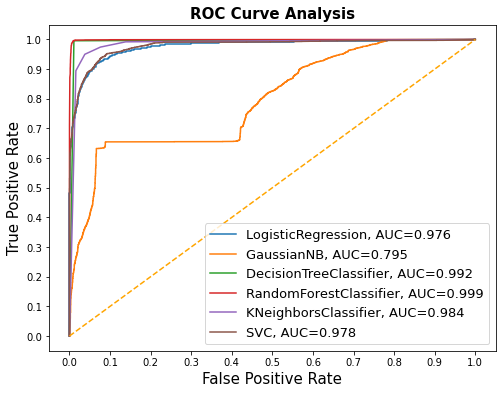

In [ ]:
# Plotting ROC curve 

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:
def get_model_results(X_train: np.ndarray, y_train: np.ndarray,
                      X_test: np.ndarray, y_test: np.ndarray, model):
    """
    model: sklearn model (e.g. RandomForestClassifier)
    """
    # Fit your training model to your training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model 
    predicted = model.predict(X_test)
    
    try:
        probs = model.predict_proba(X_test)
        print('ROC Score:')
        print(roc_auc_score(y_test, probs[:,1]))
    except AttributeError:
        pass

    # Print the ROC curve, classification report and confusion matrix
    print('\nClassification Report:')
    print(classification_report(y_test, predicted))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, predicted))

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
# Define the three classifiers to use in the ensemble

clf2 = RandomForestClassifier(class_weight={0:5, 1:12},  
                              n_estimators=100, 
                              random_state=42)

clf3 = DecisionTreeClassifier(random_state=42)

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('rf', clf2), ('dt', clf3)], voting='hard')

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)


from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
# Define the three classifiers to use in the ensemble
clf1 = RandomForestClassifier(class_weight={0:1, 1:15}, 
                              criterion='gini', 
                              max_depth=8, 
                              max_features='log2',
                              min_samples_leaf=10, 
                              n_estimators=30, 
                              n_jobs=-1,
                              random_state=5)

clf2 = SVC(class_weight={0:1, 1:12},
                          random_state=5,
                          kernel='linear',C=1000)

clf3 = DecisionTreeClassifier(random_state=5,
                              class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('rf', clf1), ('svm', clf2), ('dt', clf3)], voting='hard')

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

# Random Undersampling

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
7//2

In [ ]:
num_list = [1,2,3,4]
num_list.remove(2)
print(num_list)

In [ ]:
5!=6

In [ ]:
y="stuff;think;junk"
z = y.split(';')
len(z)

run any classifier, low dimensionality, run any classifier on this data, low dimensionality, with very high samples. Can do KNN
many point of evaluation
throw any classifier you can, any can handle this, sub sample data for support vector machine, you got alot of objects here (rows) need to break down to get support vector machine to run
#below threshold - all classifiers, not given what best classifier would be. 

No. of different classifiers in Matlab should be able to use of all of those
evaluate alot, graph lots of metrics and assessments - to work on this. 
visualizations of the data - schoastic neighborhood - part of description not evaluation, help build a case

support vector machine is very sensitive - as data will be very unbalanced. do a bit of research on handling unbalanced data set. 
subsample the dataset - equal sets of fraud and non fraud and do that multiple times with multiple samples
sample fraud class alot and non fraud not alot
combine the decision output. 
Possible to build something to deal with classifier presented in balanced dataset. Bootstrap emsembling. 

Literature review - on fraud detection in finance payment services. 
Bear in mind ethics - doesn't require ethics, data that has been - low danger - contain sensitive information. 

quote id... - detect every case. - join the data to find 
